<a href="https://colab.research.google.com/github/Jobayerdl9/Image-Processing-Lab/blob/main/Imageprocessinglab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless matplotlib


In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload an image
uploaded = files.upload()

# Read the image and convert to grayscale
image_path = list(uploaded.keys())[0]  # Get the uploaded file name
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

Saving images.jpg to images.jpg


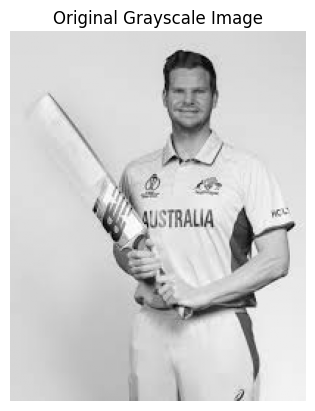

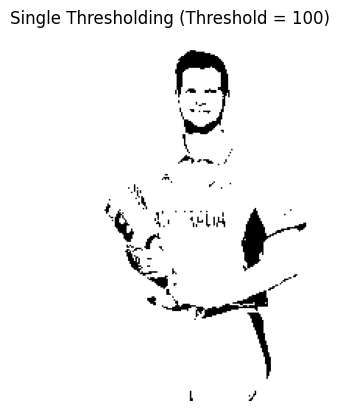

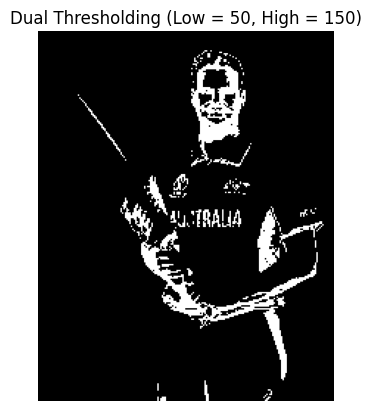

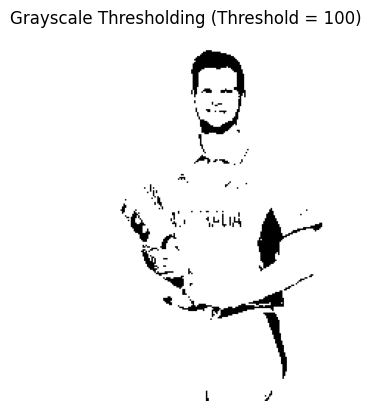

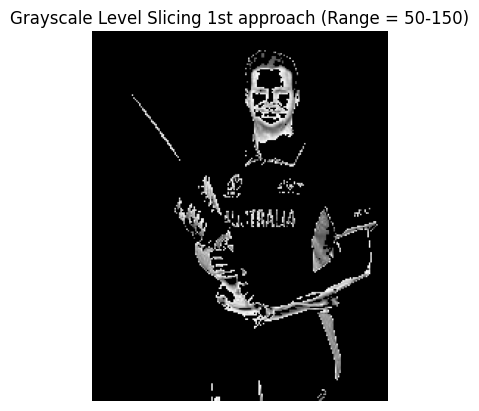

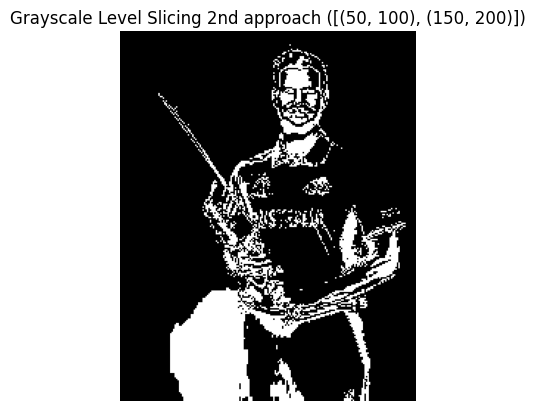

In [ ]:
# Function to display images in matplotlib
def display_image(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Single Thresholding
def single_thresholding(img, threshold_value):
    _, thresh_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
    return thresh_img

# 2. Dual Thresholding
def dual_thresholding(img, low_threshold, high_threshold):
    # First, apply low threshold
    _, low_thresh = cv2.threshold(img, low_threshold, 255, cv2.THRESH_BINARY)
    # Then, apply high threshold
    _, high_thresh = cv2.threshold(img, high_threshold, 255, cv2.THRESH_BINARY_INV)
    # Combine the two results
    dual_thresh_img = cv2.bitwise_and(low_thresh, high_thresh)
    return dual_thresh_img

# 3. Grayscale Level Slicing (1st Approach)
def grayscale_level_slicing_1(img, low_val, high_val):
    sliced_img = np.zeros_like(img)
    sliced_img[(img >= low_val) & (img <= high_val)] = img[(img >= low_val) & (img <= high_val)]
    return sliced_img

# 4. Grayscale Level Slicing (2nd Approach) - Multiple Intensity Ranges
def grayscale_level_slicing_2(img, ranges):
    sliced_img = np.zeros_like(img)
    for (low_val, high_val) in ranges:
        sliced_img[(img >= low_val) & (img <= high_val)] = 255  # or another value if needed
    return sliced_img

# 5. Grayscale Thresholding (Single Thresholding)
def grayscale_thresholding(img, threshold_value):
    # Apply the threshold
    _, thresh_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
    return thresh_img

# Display original image
display_image(img, title="Original Grayscale Image")

# Single Thresholding Example
threshold_value = 100  # You can change this value to experiment
single_thresh_img = single_thresholding(img, threshold_value)
display_image(single_thresh_img, title=f"Single Thresholding (Threshold = {threshold_value})")

# Dual Thresholding Example
low_threshold = 50
high_threshold = 150
dual_thresh_img = dual_thresholding(img, low_threshold, high_threshold)
display_image(dual_thresh_img, title=f"Dual Thresholding (Low = {low_threshold}, High = {high_threshold})")

# Grayscale Thresholding Example
threshold_value_for_grayscale = 100  # You can change this threshold value to experiment
grayscale_thresh_img = grayscale_thresholding(img, threshold_value_for_grayscale)
display_image(grayscale_thresh_img, title=f"Grayscale Thresholding (Threshold = {threshold_value_for_grayscale})")

# Grayscale Level Slicing (1st Approach)
low_val_1, high_val_1 = 50, 150  # Slicing range
sliced_img_1 = grayscale_level_slicing_1(img, low_val_1, high_val_1)
display_image(sliced_img_1, title=f"Grayscale Level Slicing 1st approach (Range = {low_val_1}-{high_val_1})")

# Grayscale Level Slicing (2nd Approach) with multiple ranges
ranges = [(50, 100), (150, 200)]  # Multiple ranges
sliced_img_2 = grayscale_level_slicing_2(img, ranges)
display_image(sliced_img_2, title=f"Grayscale Level Slicing 2nd approach ({ranges})")

